In [1]:
import pandas as pd # imports
import chants
import numpy as np
from numpy import array
import datetime
import scipy
import os
import vsm
import chants
import matplotlib.pyplot as plt

Language_VSM = pd.read_csv('pmi_retro.csv',index_col=0)

In [2]:
start = '2011-01-10' # this chunk is not relevant code for now
end = '2011-12-29'
dates = pd.date_range(start,end)
spy = chants.get_data(['SPY'],dates)
spy.index
dates1 = [date for date in dates if date in spy.index]
symbols = pd.read_csv('MarketVSM_prototype',index_col=0).index
historical_returns = chants.get_data(symbols,dates1)
historical_returns.dropna(axis=0,inplace=True)

B = pd.read_pickle('test3')
df2 = pd.read_pickle('holy')
for col in CV:
    if B[col][0][0] * 0 != 0.0:
        B.drop(col, inplace=True, axis=1)
context_sim_vecs = df2.T
context_sim_vecs.columns = B.index

ValueError: unsupported pickle protocol: 5

### Initial Data
 There are 575 stocks in this dataset and it's quite dirty because I read all the files in a folder that included real stocks and toy stocks (FAKE1 for example). I have 12 years in total but I only chose 1 year for this VSM. Any range of dates can easily be accepted, but as of now using 4 or 5 years will probably take a few hours.
 
I started with historical returns.

In [ ]:
historical_returns.iloc[:20;:]

### Matrix B
This was probably the hardest part to code and it's pretty hacky. I'm skipping the code and reading in the context window dataframe, B, it returns. I go in more detail below.

In [ ]:
B.T.head(10)

#### Context Window
The window length for this one is 12. I have a version that is length 4 as well. Easily changing window lengths is not possible for now since I hardcoded each window. I know it would make more sense to have the windows be like   
|12_..._4__3__2__1__|**self**                               
or the other way around (whichever is like rolling mean)

but when I made this I was more familiar with the language style of basing the window around a center word so it's instead

|-6..._-2__-1__center__1__2...6|

#### Visualizing a context window for one stock, eg one iteration of the window scan
The top 6 values in the printed array are for the returns (relative to the center date) from the 6 trading dates before the 2011-01-10. The center date is the newline split and then you have the returns from the 6 dates ahead. This would be much easier to imagine if the window was not centered style since it would pretty much be a mini returns plot. A bit confusing but you can get the spirit.


In [ ]:
print(B['AAPL']['2011-01-10'])

#### Context Windows as Vectors
I'm glossing over what different shapes mean since that's more connected to how you define the window. If you imagine the center date in 
```
[1.03371025 1.03371025 1.03371025 1.02531798 1.02615107 1.01885383
 1.00238109 0.99428488 0.99067403 0.99428488 1.00530676 1.01067014]
```
as 1, it looks like this. With 6 on the x-axis being the center date. You can see it's past and future returns.

In [ ]:
pd.DataFrame([1.03371025,1.03371025,1.03371025,1.02531798,1.02615107,1.01885383,1.00238109,0.99428488,0.99067403,0.99428488,1.00530676,1.01067014]).plot()

This is one element in the Context Windows Matrix. Specifically, the first entry in AAPL. Let's look at a few stocks on the same day and get a sense their shapes of return movement. This time I won't insert the center date

In [ ]:
pd.DataFrame(B['GE']['2011-08-23']).plot()
pd.DataFrame(B['AAPL']['2011-08-23']).plot()
pd.DataFrame(B['SPY']['2011-08-23']).plot()
pd.DataFrame(B['AMD']['2011-08-23']).plot()

Hopefully this gives you a sense of what the Context Windows matrix, B contains

In [ ]:
B.T.head(10) # context window scan was on total timeframe which is why there are no blanks in the starting dates (it's a slice)

If we're trying to make comparisons with the words vsm, this is like step 0--- imposing a sense of context and co-occurance on some initial dataset. 

#### What kind of Matrix is B?
B is kind of like a term-document matrix. You can treat the stretch of returns for some timeframe as a corpus. It's a container of documents. And like normal containers, we can say a document is a page or a paragraph or five words... it's up to us to define the context. In this case, I defined it as 12 days. I'll skip over what it means to choose a large window or small window, as well as different scaling options. The big difference between traditional term-documents and this is sparsity. Here, we're guaranteed an entry for each term, so there's no sparsity at all. So c1 (2011-01-01) contains an entry for each term (stock) and instead of a scalar count, the entry is a **vector** whose dimension is our window length. 

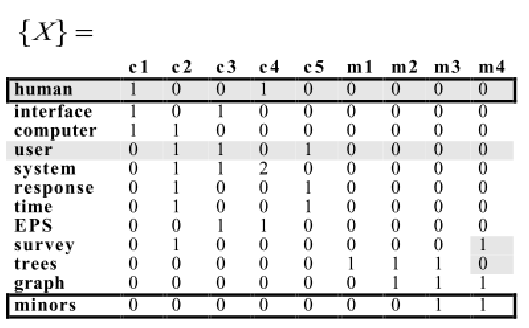

In [ ]:
B.T.head()

## Similarity Vectors
Imagine you take perspective of stock 'A', on the 2011-01-10 (day1). Let's look at it's shape and the shapes of AA and AAPL on day1.

In [ ]:
pd.DataFrame(B['A']['2011-08-23']).plot()
pd.DataFrame(B['AA']['2011-08-23']).plot()
pd.DataFrame(B['AAPL']['2011-08-23']).plot()

If you took the dot product between 

In [ ]:
print(pd.DataFrame(CV['A']['2011-08-23']))

and

In [ ]:
print(pd.DataFrame(CV['AA']['2011-08-23']))
print(pd.DataFrame(CV['AAPL']['2011-08-23']))

for one day, but along every date, you'd get

In [ ]:
context_sim_vecs.iloc[:3,:1]

Doing so for everyday, you'd get

In [ ]:
context_sim_vecs.iloc[:3,:].T.plot()
context_sim_vecs.iloc[:3,:]

In [ ]:
C = context_sim_vecs
C

In [ ]:
context_sim_vecs.T['KO']["KO"].plot()
context_sim_vecs.T['KO']["PEP"].plot()
context_sim_vecs.T['KO']["SPY"].plot()
#context_sim_vec
# s.T['AA']["SPY"].plot()
#context_sim_vecs.T['AA']["AMD"].plot()
#context_sim_vecs.T['AA']["XOM"].plot()

## Recovering Square Matrix
From the similarity vectors, C, I'll get the final matrix which will be square and term-term.

I used pandas multi-indexer to slice C into 575 groups. Each matrix represents a stock and it contains the dot products between all stocks and itself.
 
 I've shown a messy graph for stock 'A'. Notice it's all relative to 'A', which is a straight line at 1. Each stock has this, with itself being the vector of reference.

In [ ]:
fig, ax = plt.subplots()
ax.plot(C.T['A'])

ax.plot(label='')

ax.legend()

plt.show() 

In [ ]:
C.T['A']

In [ ]:
C.T['AA']

In [ ]:
C.T['ZMH'] # 1's along the last column

Let's look at a word embedding from the language VSM. Notice it's a vector and the VSM itself is a matrix

In [ ]:
pd.DataFrame(Language_VSM['youth'])

In [ ]:
Language_VSM

Returning to the current situaiton, for each matrix in C, we take C[stock] X C[stock] transpose. 
This is leaves us with a square, 575 X 575 term-term matrix for *each* stock.

In [ ]:
def magic(context_sim_vecs):
    Tensor = {}
    counter = 0
    for symbol in context_sim_vecs.T['A'].columns:
        df5 = context_sim_vecs.T[symbol]
        X = (np.matmul(df5.T,df5)/246).fillna(0)
        #X.replace([np.inf, -np.inf], 1, inplace=True)
        Tensor[symbol] = X
        counter+=1
    return Tensor
        # WHY IS IT SO UNSTABLE.
Tensor = magic(context_sim_vecs)

In [ ]:
Tensor; # it's a dictionary of matrices

It gets murky here for sure, but I'm pretty sure since the underlying values of this market VSM are vectors and not scalars, there's an extra axis. Which means the market VSM is actually a *tensor* and not a matrix. Therefore the embeddings themselves are *matrices* and not vectors. 

Notice the diagonal of 1's that appears in the Tensor, that's a good sign.

In [ ]:
Tensor['A']

In [ ]:
Tensor['AA']

In [ ]:
Tensor['AAPL']

### Final Output
Okay, so all of the operations done in vsm.py assume a 2d matrix VSM. They're simple functions, like taking the distance between a pair of vectors (pretty much vsm.neighbors). All of these operations are equally definable for matrices and I know the math for it but I don't know to code it (I think you need pytorch for tensors). 

So to make a prototype, I made a matrix from the Tensor by selecting one vector from the stock embeddings (which are matrices) that represented a direct measurement. I'll just show what I did, since it's a bit arbitrary and confusing.

In [ ]:
Tensor['A']

In [ ]:
A = Tensor['A'].T['A']
pd.DataFrame(A)

In [ ]:
AA = Tensor['AA'].T['AA']
pd.DataFrame(AA)

In [ ]:
# continuing for rest of stocks
open = {}
for matrix in Tensor:
    vec = Tensor[matrix].T[matrix]
    open[matrix] = vec
vsm2 = pd.DataFrame(open)
vsm2.index = vsm2.columns
vsm2

This is nearly the Market VSM you saw in the 1st notebook. There's no weighting yet. I amplify co-occurances that are unusually high by applying an observed/expected type of thing called pointwise mutual information (pmi), and that's the final matrix. I'll go into more detail on matrix re-weighting some other time.

In [ ]:
Market_VSM = vsm.pmi(vsm2)
Market_VSM

Even though there's a huge loss of information from Tensor to matrix, the co-integration results using this vsm are still quite interesting. But that's pretty much how you go from raw daily returns to the vsm. 